<center>
<img src="https://supportvectors.ai/logo-poster-transparent.png" width="400px" style="opacity:0.7">
</center>

In [1]:
%run supportvectors-common.ipynb


<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



# **Keyword Search Algorithms**

TF-IDF and BM25 are both ranking algorithms used to retrieve information/documents that matches a user's query using keywords. 

BM25 builds on TF-IDF but incorporates additional mechanisms like term frequency saturation and normalising document length, to improve search relevance.

## **TF-IDF (Term-Frequency, Inverse-Document Frequency)**

TF-IDF is a statistical measure used to evaluate the importance of a word in a document relative to a collection (or corpus) of documents

$$\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)$$

### **Term Frequency**

Term frequency, $\text{TF}(t, d)$, is the relative frequency of term t within document d

$$\text{TF}(t, d) = \frac{f_{t, d}}{\text{len}(d)}$$
  - $f_{t, d}$: Number of times term $t$ appears in document $d$
  - $\text{len}(d)$: Total number of terms in document $d$

### **Inverse Document Frequency**

Inverse document frequency, $\text{IDF}(t)$ is a measure of how much information the word provides, i.e., how common or rare it is across all documents. 
Words unique to a small percentage of documents (e.g., technical jargons) receive higher importance values than words common across all documents (e.g., the, and, is, a).

$$\text{IDF}(t) = \log(\frac{N}{N_t})$$
  - $N$: Total number of documents in the corpus
  - $N_t$: Number of documents containing the term $t$

#### ***Practical Considerations and Variations***
Log can be base 2, e or 10. Two variants of IDF to create smoothing and avoid divide by zero error, especially when denominator can be zero.

$$\text{IDF}(t) = \ln(\frac{N+1}{N_t+1})$$
$$\text{IDF}(t) = \log(\frac{N+1}{N_t+1})+1$$

**NOTE:** Extra +1 is added to balance the IDF in case of log10 with ln, as can be seen in below plot.

<img src="../images/LogVsLn.png" width="700px">

## **BM25 - Best Match 25**

Given a query Q, containing keywords ${\displaystyle q_{1},q_{2},...,q_{n}}$, the BM25 score or relevance score of a document D is: 

$$
\text{BM25}(q, d) = \sum_{t \in q} \text{IDF}(t) \cdot \frac{f_{t, d} \cdot (k_1 + 1)}{f_{t, d} + k_1 \cdot \left(1 - b + b \cdot \frac{\text{len}(d)}{\text{avgdl}}\right)}
$$

Where:

- $q$: Query.
- $t$: Term in the query.
- $f_{t, d}$: Frequency of term $t$ in document $d$.
- $\text{len}(d)$: Total number of terms in document $d$.
- $\text{avgdl}$: Average document length in the corpus.
- $k_1$: BM25 parameter controls term saturation, typically $k_1 = 1.2$
- $b$: BM25 parameter controls length normalization, typically $b = 0.75$

The Inverse Document Frequency (IDF) in BM25 is:

$$
\text{IDF}(t) = \ln\left(\frac{N - N_t + 0.5}{N_t + 0.5} + 1\right)
$$

Where:

- $N$: Total number of documents in the corpus.
- $N_t$: Number of documents containing the term $t$.

### **TF-IDF Calculation Example**

In [2]:
import numpy as np
import pandas as pd

# Select a corpus of documents and tokenize them
corpus_docs = [
                "C is a compiled programming language",
                "Java is a compiled and interpreted programming language used for web development etc. and is very secure too",
                "Python is an interpreted programming language",
            ]

tokenized_docs = []
for doc in corpus_docs:
    words = doc.split()
    tokenized_docs.append(words)

# Get all the unique words present in the corpus of documents
vocab = set(tokenized_docs[0] + tokenized_docs[1] + tokenized_docs[2])
print(vocab)

{'used', 'language', 'etc.', 'web', 'a', 'C', 'Python', 'programming', 'too', 'an', 'secure', 'for', 'interpreted', 'compiled', 'is', 'Java', 'development', 'very', 'and'}


In [3]:
# Method to calculate TF-IDF Score of any word in the given document
def tf_idf_scores(word, tokenized_document, tokenized_documents):

    tf = tokenized_document.count(word)/len(tokenized_document)

    total_number_of_docs = len(tokenized_documents)
    number_of_docs_containing_word = sum([1 for doc in tokenized_documents if word in doc])

    idf = np.log10((total_number_of_docs+1) / (number_of_docs_containing_word+1)) + 1

    tf_idf =  round(tf * idf, 5)

    return float(tf_idf)

In [4]:
tf_idf_scores("C", tokenized_docs[0], tokenized_docs)

0.21684

In [5]:
all_token_scores = []

for word in vocab:
    score_a = tf_idf_scores(word, tokenized_docs[0], tokenized_docs)
    score_b = tf_idf_scores(word, tokenized_docs[1], tokenized_docs)
    score_c = tf_idf_scores(word, tokenized_docs[2], tokenized_docs)
    all_token_scores.append((word, score_a, score_b, score_c))

# Add length of documents too, as last row 
all_token_scores.append(("LENGTH_OF_DOC", len(tokenized_docs[0]), len(tokenized_docs[1]), len(tokenized_docs[2])))

# Define column headers
columns = ['Term', 'Doc1_Score', 'Doc2_Score', 'Doc3_Score']

# Create a DataFrame
df = pd.DataFrame(all_token_scores, columns=columns)

# Display the DataFrame containg TF-IDF scores for each token in each document
print(df)

             Term  Doc1_Score  Doc2_Score  Doc3_Score
0            used     0.00000     0.07228     0.00000
1        language     0.16667     0.05556     0.16667
2            etc.     0.00000     0.07228     0.00000
3             web     0.00000     0.07228     0.00000
4               a     0.18749     0.06250     0.00000
5               C     0.21684     0.00000     0.00000
6          Python     0.00000     0.00000     0.21684
7     programming     0.16667     0.05556     0.16667
8             too     0.00000     0.07228     0.00000
9              an     0.00000     0.00000     0.21684
10         secure     0.00000     0.07228     0.00000
11            for     0.00000     0.07228     0.00000
12    interpreted     0.00000     0.06250     0.18749
13       compiled     0.18749     0.06250     0.00000
14             is     0.16667     0.11111     0.16667
15           Java     0.00000     0.07228     0.00000
16    development     0.00000     0.07228     0.00000
17           very     0.0000

### **BM25 Calculation Example**

In [6]:
import bm25s

# Tokenize the corpus and index it
corpus_tokens = bm25s.tokenize(corpus_docs)
retriever = bm25s.BM25(corpus=corpus_docs)
retriever.index(corpus_tokens)

# Search the corpus with a query
query = "compiled"
tokenized_query = query.split()

docs, _ = retriever.retrieve([tokenized_query], k=3)
scores = retriever.get_scores(tokenized_query)
print(f"Scores by documents: {scores}")
print("\nTop n=3 Documents:\n")
print(docs)

Split strings:   0%|          | 0/3 [00:00<?, ?it/s]

BM25S Count Tokens:   0%|          | 0/3 [00:00<?, ?it/s]

BM25S Compute Scores:   0%|          | 0/3 [00:00<?, ?it/s]

BM25S Retrieve:   0%|          | 0/1 [00:00<?, ?it/s]

Scores by documents: [0.24634673 0.13403481 0.        ]

Top n=3 Documents:

[['C is a compiled programming language'
  'Java is a compiled and interpreted programming language used for web development etc. and is very secure too'
  'Python is an interpreted programming language']]


#### **Comparison of the scores for word e.g. "compiled"**

**Document-Lengths = [6  18  6]**

**TF-IDF** = [0.18749     0.06250     0.00]  => 0.18749/0.06250 = **2.9998**

**BM25**   = [0.24634     0.13403     0.00]  => 0.24634/0.13403 = **1.837**

***TF-IDF for shorter document is ~3 times higher than the TF-IDF of longer document, but BM25 is only 1.8 times.***

***So, we can see that BM25 penalizes the longer document less harshly compared to TF-IDF.***


### ***Example to show the relevance of penalty on longer documents in TF-IDF***

In [7]:
test_corpus_docs = [
    "The quick brown fox jumps over the lazy dog. The fox is clever. The dog is sleepy.",

    "The fox is a wild animal. The clever fox hides in the forest. The fox hunts at night. Many cultures see the fox as a symbol of intelligence. Farmers protect their chickens from fox attacks. Population of fox is increasing and they keep wandering in the forest and village in search of prey.",

    "The dog is loyal pet."
]

test_tokenized_docs = []
for doc in test_corpus_docs:
    test_tokenized_docs.append(doc.split())

all_document_scores = []

d1 = tf_idf_scores("fox", test_tokenized_docs[0], test_tokenized_docs)
d2 = tf_idf_scores("fox", test_tokenized_docs[1], test_tokenized_docs)
d3 = tf_idf_scores("fox", test_tokenized_docs[2], test_tokenized_docs)

all_document_scores.append((d1, d2, d3))

print("TF-IDF Scores of each document respectively, for keyword: fox")
print(all_document_scores)

# Tokenize the corpus and index it
corpus_tokens1 = bm25s.tokenize(test_corpus_docs)
retriever1 = bm25s.BM25(corpus=test_corpus_docs)
retriever1.index(corpus_tokens1)

# Search the corpus with a query
query = "fox"
tokenized_query1 = query.split()

docs, _ = retriever1.retrieve([tokenized_query1], k=3)
scores = retriever1.get_scores(tokenized_query1)
print(f"BM-25 Scores by documents: {scores}")

TF-IDF Scores of each document respectively, for keyword: fox
[(0.13235, 0.12735, 0.0)]


Split strings:   0%|          | 0/3 [00:00<?, ?it/s]

BM25S Count Tokens:   0%|          | 0/3 [00:00<?, ?it/s]

BM25S Compute Scores:   0%|          | 0/3 [00:00<?, ?it/s]

BM25S Retrieve:   0%|          | 0/1 [00:00<?, ?it/s]

BM-25 Scores by documents: [0.29375228 0.32414043 0.        ]


### **TF-IDF vs BM25 scores vs term-frequency PLOT**

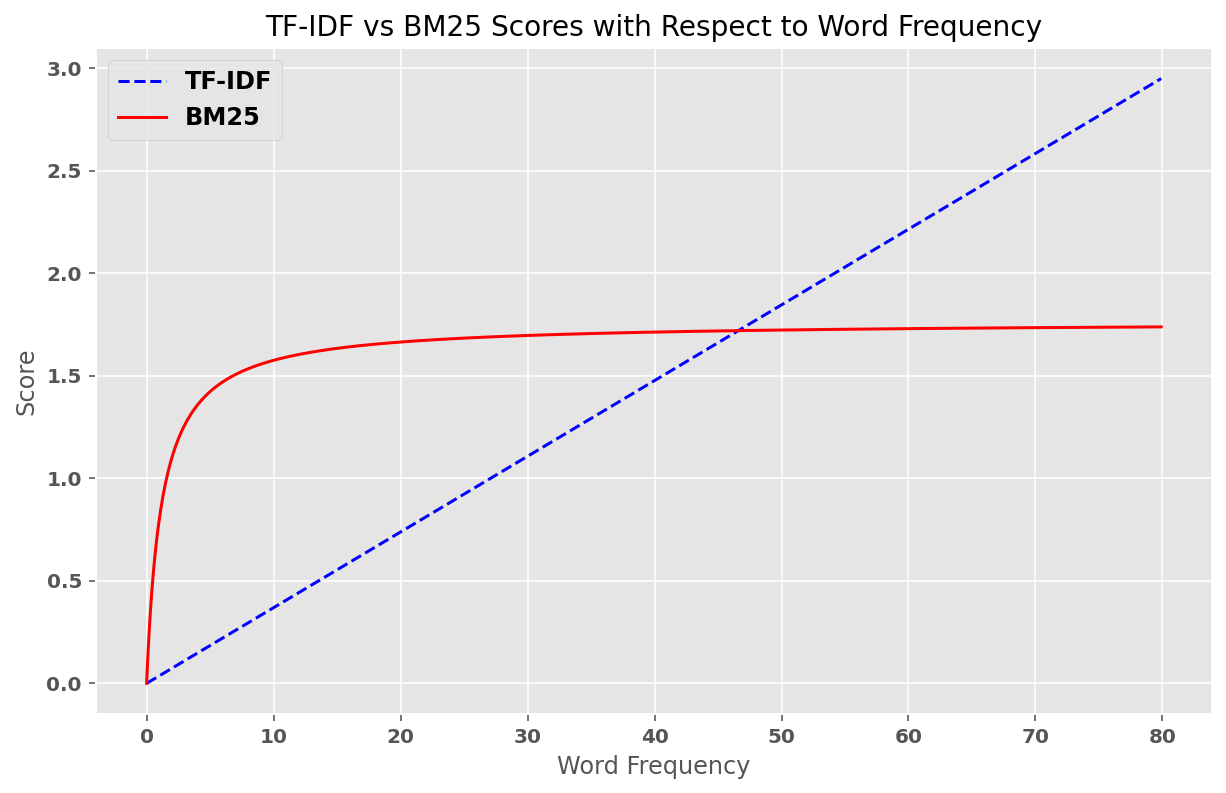

In [ ]:
import matplotlib.pyplot as plt

# Parameters
k1 = 1.2
b = 0.75
N = 20  # Total number of documents
nt = 6   # Number of documents containing the term
avgdl = 40  # Average document length
doc_length = 40  # Document length

idf = np.log((N - nt + 0.5) / (nt + 0.5))  # IDF for BM25

# Frequency range
frequencies = np.arange(0, 80, 0.1)  # Term frequencies from 0 to 80

# TF-IDF Calculation
tf_idf_scores = frequencies / doc_length *(np.log10((1+N) / (1 + nt))+1)

# BM25 Calculation
bm25_scores = idf * (frequencies * (k1 + 1)) / (frequencies + k1 * (1 - b + b * doc_length / avgdl))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(frequencies, tf_idf_scores, label='TF-IDF', color='blue', linestyle='--')
plt.plot(frequencies, bm25_scores, label='BM25', color='red', linestyle='-')
plt.title('TF-IDF vs BM25 Scores with Respect to Word Frequency', fontsize=14)
plt.xlabel('Word Frequency', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


### **Main advantages of BM25 Search over TF-IDF**

***1. Saturation Handling:*** BM25's non-linear term frequency handling prevents overemphasis on frequent terms. It recognizes that the importance of a term plateaus after a certain frequency.

***2. Document Length Normalization:*** Penalizes longer documents less harshly than TF-IDF.